In [42]:
# Importing pandas library and simplifying folder path for reuse
import pandas as pd

folder_path = "/content/drive/MyDrive/Cyclistic/"


In [43]:
#loading csv files into dataframes q1, q2, q3, q4
q1 = pd.read_csv(folder_path + "Divvy_Trips_2019_Q1.csv")
q2 = pd.read_csv(folder_path + "Divvy_Trips_2019_Q2.csv")
q3 = pd.read_csv(folder_path + "Divvy_Trips_2019_Q3.csv")
q4 = pd.read_csv(folder_path + "Divvy_Trips_2019_Q4.csv")

In [44]:
#checking if all the dataframes have the same column names
print("Q1 columns:\n", q1.columns)
print("\nQ2 columns:\n", q2.columns)
print("\nQ3 columns:\n", q3.columns)
print("\nQ4 columns:\n", q4.columns)

Q1 columns:
 Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

Q2 columns:
 Index(['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time',
       '01 - Rental Details Local End Time', '01 - Rental Details Bike ID',
       '01 - Rental Details Duration In Seconds Uncapped',
       '03 - Rental Start Station ID', '03 - Rental Start Station Name',
       '02 - Rental End Station ID', '02 - Rental End Station Name',
       'User Type', 'Member Gender',
       '05 - Member Details Member Birthday Year'],
      dtype='object')

Q3 columns:
 Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

Q4 columns:
 Index(['trip_id', 'start_time', 'end_time

In [45]:
#Number of Rows and Column information for each dataframe
print(q1.shape)
print(q2.shape)
print(q3.shape)
print(q4.shape)
print("total rows",q1.shape[0]+q2.shape[0]+q3.shape[0]+q4.shape[0])


(365069, 12)
(1108163, 12)
(1640718, 12)
(704054, 12)
total rows 3818004


In [46]:
#changing q2's column names to match q1,q3 and 14
q2.columns = [
    'trip_id',
    'start_time',
    'end_time',
    'bikeid',
    'tripduration',
    'from_station_id',
    'from_station_name',
    'to_station_id',
    'to_station_name',
    'usertype',
    'gender',
    'birthyear'
]
q2.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [47]:
#combining all 4 dataframes together one after the other
all_2019 = pd.concat([q1, q2, q3, q4], ignore_index=True)

In [48]:
#Preview of combined dataset
all_2019.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [49]:
#converting subscriber to member and customer to casual
all_2019['usertype'] = all_2019['usertype'].replace({
    'Subscriber': 'member',
    'Customer': 'casual'
})

In [50]:
# row/column information of the dataframe
print(all_2019.shape)
#datatype information of each column of the dataframe
print(all_2019.dtypes)

(3818004, 12)
trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object


In [51]:
#converting start_time, end_time from text (object) type to date-time type
all_2019['start_time'] = pd.to_datetime(all_2019['start_time'])
all_2019['end_time'] = pd.to_datetime(all_2019['end_time'])
print(all_2019.dtypes)

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
dtype: object


In [52]:
#adding a new column ride_length in seconds
all_2019['ride_length_seconds'] = ( all_2019['end_time'] - all_2019['start_time']).dt.total_seconds()
#and then converting it to minutes
all_2019['ride_length_minutes'] = all_2019['ride_length_seconds'] / 60
print(all_2019.columns)

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear',
       'ride_length_seconds', 'ride_length_minutes'],
      dtype='object')


In [53]:
#adding a new column starting hour
all_2019['ride_hour'] = all_2019['start_time'].dt.hour

In [54]:
#adding which day of the week the ride was taken
all_2019['day_of_week'] = all_2019['start_time'].dt.day_name()

In [55]:
#Using filters to filter out trips that have negative ride_length, more than 24hours
all_2019_filtered = all_2019[(all_2019['ride_length_seconds'] >= 0) & (all_2019['ride_length_seconds'] <= 86400)]
#Filtered number of rows
print("The number of rows that were filtered out were", all_2019.shape[0]-all_2019_filtered.shape[0])

The number of rows that were filtered out were 1862


In [56]:
#count how many subscribers/customers are there
m_c_count = all_2019_filtered['usertype'].value_counts()
print("There are", m_c_count['member'],"member riders.")
print("There are", m_c_count['casual'],"casual riders.")

There are 2936859 member riders.
There are 879283 casual riders.


In [57]:
#Average ride length (minutes) of casual vs members
m_c_avg = all_2019_filtered.groupby('usertype')['ride_length_minutes'].mean().reset_index()
c_avg = m_c_avg[m_c_avg['usertype'] == 'casual']['ride_length_minutes'].values[0]
m_avg = m_c_avg[m_c_avg['usertype'] == 'member']['ride_length_minutes'].values[0]
print("The average ride length of casual riders is", round(c_avg,3),"minutes.")
print("The average ride length of member riders is", round(m_avg,3),"minutes.")

The average ride length of casual riders is 39.429 minutes.
The average ride length of member riders is 12.932 minutes.


In [58]:
#Which day are the bikes being used the most
day_of_week_count = all_2019_filtered['day_of_week'].value_counts()
print("Sunday has ", day_of_week_count['Sunday'], "rides.")
print("Monday has ", day_of_week_count['Monday'], "rides.")
print("Tuesday has ", day_of_week_count['Tuesday'], "rides.")
print("Wednesday has ", day_of_week_count['Wednesday'], "rides.")
print("Thursday has ", day_of_week_count['Thursday'], "rides.")
print("Friday has ", day_of_week_count['Friday'], "rides.")
print("Saturday has ", day_of_week_count['Saturday'], "rides.")
print("The day with the most rides is", day_of_week_count.idxmax(), "with", day_of_week_count.max(), "rides.")


Sunday has  426119 rides.
Monday has  560069 rides.
Tuesday has  585446 rides.
Wednesday has  583806 rides.
Thursday has  588040 rides.
Friday has  577824 rides.
Saturday has  494838 rides.
The day with the most rides is Thursday with 588040 rides.


In [59]:
#Which day are the bikes being used the most
day_of_week_avg = all_2019_filtered.groupby('day_of_week')['ride_length_minutes'].mean().reset_index()
sun_avg = day_of_week_avg[day_of_week_avg['day_of_week'] == 'Sunday']['ride_length_minutes'].values[0]
mon_avg = day_of_week_avg[day_of_week_avg['day_of_week'] == 'Monday']['ride_length_minutes'].values[0]
tue_avg = day_of_week_avg[day_of_week_avg['day_of_week'] == 'Tuesday']['ride_length_minutes'].values[0]
wed_avg = day_of_week_avg[day_of_week_avg['day_of_week'] == 'Wednesday']['ride_length_minutes'].values[0]
thu_avg = day_of_week_avg[day_of_week_avg['day_of_week'] == 'Thursday']['ride_length_minutes'].values[0]
fri_avg = day_of_week_avg[day_of_week_avg['day_of_week'] == 'Friday']['ride_length_minutes'].values[0]
sat_avg = day_of_week_avg[day_of_week_avg['day_of_week'] == 'Saturday']['ride_length_minutes'].values[0]

print("Sunday has an average ride length of", round(sun_avg,3), "minutes")
print("Monday has an average ride length of", round(mon_avg,3), "minutes")
print("Tuesday has an average ride length of", round(tue_avg,3), "minutes")
print("Wednesday has an average ride length of", round(wed_avg,3), "minutes")
print("Thursday has an average ride length of", round(thu_avg,3), "minutes")
print("Friday has an average ride length of", round(fri_avg,3), "minutes")
print("Saturday has an average ride length of", round(sat_avg,3), "minutes")

Sunday has an average ride length of 25.038 minutes
Monday has an average ride length of 17.465 minutes
Tuesday has an average ride length of 16.365 minutes
Wednesday has an average ride length of 16.319 minutes
Thursday has an average ride length of 16.905 minutes
Friday has an average ride length of 17.938 minutes
Saturday has an average ride length of 25.836 minutes


In [60]:
#Ride count according to starting station
starting_station_count = all_2019_filtered['from_station_name'].value_counts()
print("The starting station with the most rides is", starting_station_count.idxmax(), "with", starting_station_count.max(), "rides.")
#Average Ride minutes per starting station
starting_station_avg = all_2019_filtered.groupby('from_station_name')['ride_length_minutes'].mean().reset_index()
ss_max_row = starting_station_avg.loc[starting_station_avg['ride_length_minutes'].idxmax()]
print("The starting station with the highest average ride length is", ss_max_row['from_station_name'], "with an average ride length of", round(ss_max_row['ride_length_minutes'],3), "minutes.")

The starting station with the most rides is Streeter Dr & Grand Ave with 67947 rides.
The starting station with the highest average ride length is South Chicago Ave & Elliot Ave with an average ride length of 200.85 minutes.


In [61]:
#Ride count according to ending station
ending_station_count = all_2019_filtered['to_station_name'].value_counts()
print("The ending station with the most rides is", ending_station_count.idxmax(), "with", ending_station_count.max(), "rides.")
#Average Ride minutes per ending station
ending_station_avg = all_2019_filtered.groupby('to_station_name')['ride_length_minutes'].mean().reset_index()
es_max_row = ending_station_avg.loc[ending_station_avg['ride_length_minutes'].idxmax()]
print("The ending station with the highest average ride length is", es_max_row['to_station_name'], "with an average ride length of", round(es_max_row['ride_length_minutes'],3), "minutes.")

The ending station with the most rides is Streeter Dr & Grand Ave with 81709 rides.
The ending station with the highest average ride length is HUBBARD ST BIKE CHECKING (LBS-WH-TEST) with an average ride length of 334.846 minutes.


In [62]:
#Ride count according to birth year
birthyear_count = all_2019_filtered['birthyear'].value_counts()
print("The birthyear with the most rides is", birthyear_count.idxmax(), "with", birthyear_count.max(), "rides.")
#Average Ride minutes per birthyear
birthyear_avg = all_2019_filtered.groupby('birthyear')['ride_length_minutes'].mean().reset_index()
by_max_row = birthyear_avg.loc[birthyear_avg['ride_length_minutes'].idxmax()]
print("The birthyear with the highest average ride length is", by_max_row['birthyear'], "with an average ride length of", round(by_max_row['ride_length_minutes'],3), "minutes.")

The birthyear with the most rides is 1992.0 with 203601 rides.
The birthyear with the highest average ride length is 1910.0 with an average ride length of 557.933 minutes.


In [63]:
#loading visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

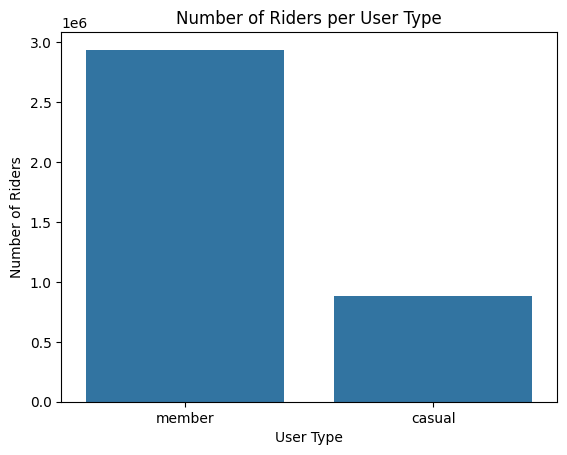

In [64]:
#Draw the chart using sns
sns.barplot(x=m_c_count.index, y=m_c_count.values)
#Use matplotlib.pyplot to add titles, labels.
plt.title('Number of Riders per User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Riders')
#to show the plot
plt.show()

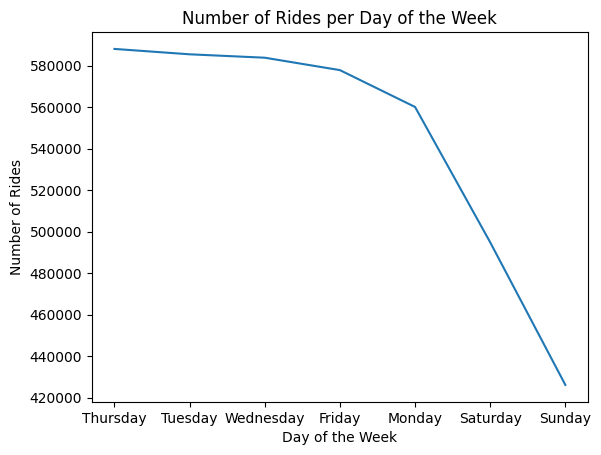

In [65]:
sns.lineplot(x=day_of_week_count.index, y=day_of_week_count.values)
#sns.barplot(x=day_of_week_count.index, y=day_of_week_count.values)
plt.title('Number of Rides per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

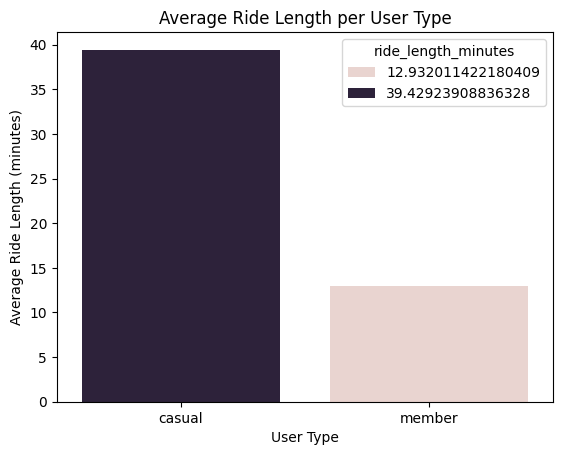

In [66]:
sns.barplot(x='usertype', y='ride_length_minutes',hue='ride_length_minutes', data=m_c_avg)
plt.title('Average Ride Length per User Type')
plt.xlabel('User Type')
plt.ylabel('Average Ride Length (minutes)')
plt.show()

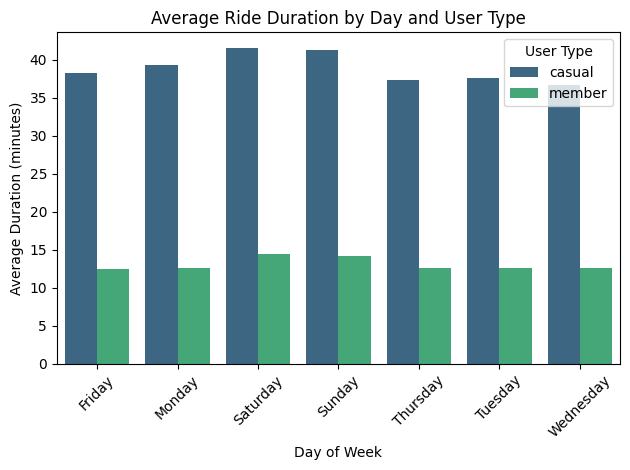

In [67]:
avg_by_day = all_2019_filtered.groupby(['usertype', 'day_of_week'])['ride_length_minutes'].mean().reset_index()
sns.barplot(x='day_of_week', y='ride_length_minutes', hue='usertype', palette='viridis',data=avg_by_day)
plt.title("Average Ride Duration by Day and User Type")
plt.xlabel("Day of Week")
plt.ylabel("Average Duration (minutes)")
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.tight_layout()
plt.show()

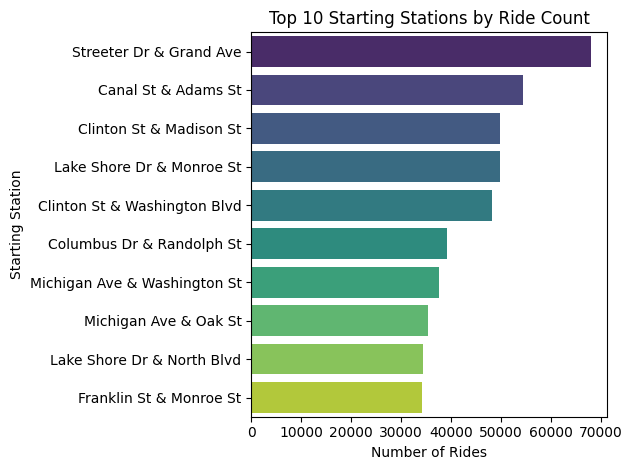

In [68]:

top_stations = all_2019_filtered['from_station_name'].value_counts().head(10).reset_index()
top_stations.columns = ['from_station_name', 'ride_count']


sns.barplot(y='from_station_name', x='ride_count', hue='from_station_name',palette='viridis',data=top_stations)
plt.title("Top 10 Starting Stations by Ride Count")
plt.xlabel("Number of Rides")
plt.ylabel("Starting Station")
plt.tight_layout()
plt.show()


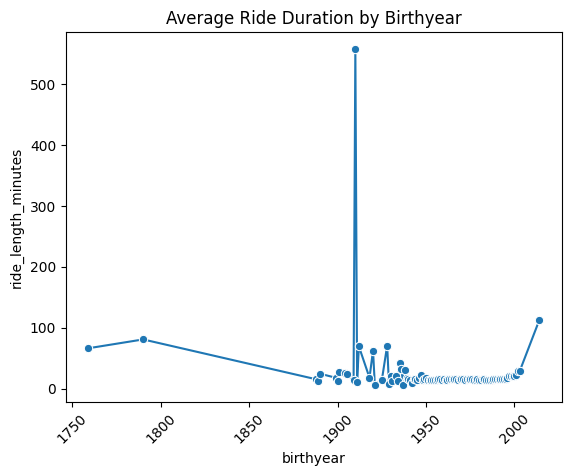

In [69]:
#Line Plot to see ride length per birthyear
sns.lineplot(x='birthyear', y='ride_length_minutes', data=birthyear_avg, marker='o')
plt.title('Average Ride Duration by Birthyear')
plt.xticks(rotation=45)
plt.show()

In [70]:
#Filtering out the birth year data. only taking 15-100 years as appropriate age
all_2019_by_filtered = all_2019_filtered[(all_2019_filtered['birthyear'] >= 1919) & (all_2019_filtered['birthyear'] <= 2004)]
#Filtered number of rows
print("The number of rows that were filtered out were", all_2019.shape[0]-all_2019_by_filtered.shape[0])

The number of rows that were filtered out were 540442


The birthyear with the highest average ride length is 1928.0 with an average ride length of 70.633 minutes.


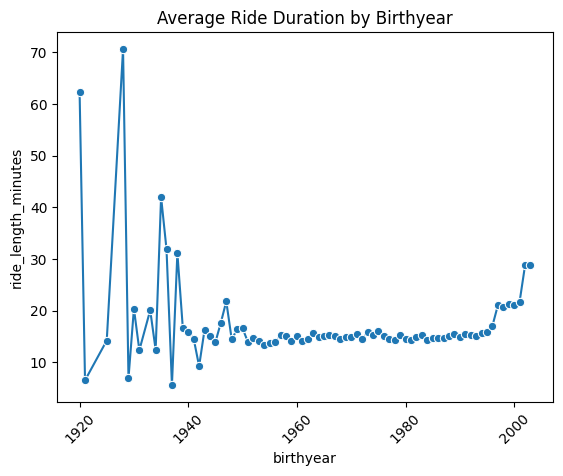

In [71]:
#New birthyear average
new_birthyear_avg = all_2019_by_filtered.groupby('birthyear')['ride_length_minutes'].mean().reset_index()
newby_max_row = new_birthyear_avg.loc[new_birthyear_avg['ride_length_minutes'].idxmax()]
print("The birthyear with the highest average ride length is", newby_max_row['birthyear'], "with an average ride length of", round(newby_max_row['ride_length_minutes'],3), "minutes.")
#Line Plot to see ride length per birthyear
sns.lineplot(x='birthyear', y='ride_length_minutes', data=new_birthyear_avg, marker='o')
plt.title('Average Ride Duration by Birthyear')
plt.xticks(rotation=45)
plt.show()

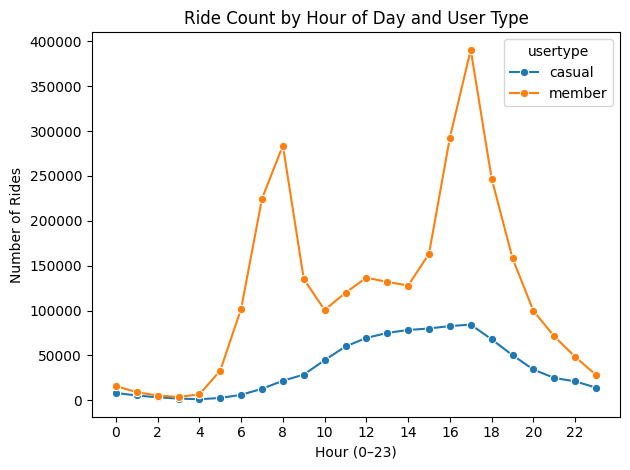

In [74]:


# Group by hour and user type
hourly_counts = all_2019_filtered.groupby(['ride_hour', 'usertype']).size().reset_index(name='ride_count')

# Plot
sns.lineplot(x='ride_hour', y='ride_count', hue='usertype', data=hourly_counts, marker='o')
plt.title("Ride Count by Hour of Day and User Type")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Rides")
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()


In [76]:
!pip freeze > requirements.txt
